In [24]:
import matplotlib.pyplot as plt
import statistics
import numpy as np

Text(0, 0.5, 'Average percent of rounds won by adversary')

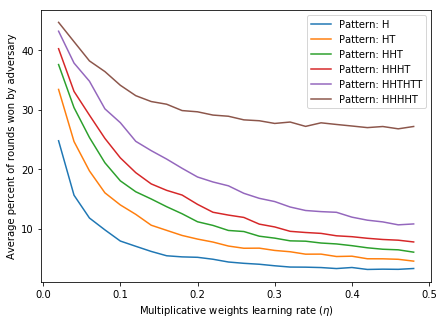

In [35]:
# Matching pennies: etas [0.02 --> 0.5, 0.02], count = 100
etas = [0.02,0.04,0.06,0.08,0.1,0.12000000000000001,0.14,0.16,0.18,0.19999999999999998,0.21999999999999997,0.23999999999999996,0.25999999999999995,0.27999999999999997,0.3,0.32,0.34,0.36000000000000004,0.38000000000000006,0.4000000000000001,0.4200000000000001,0.4400000000000001,0.46000000000000013,0.48000000000000015]
learnerscore = [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]

# Data collected from running experiments
userscore0 = np.array([32.93,18.52,13.37,10.87,8.61,7.58,6.59,5.77,5.56,5.48,5.12,4.61,4.37,4.2,3.92,3.69,3.67,3.6,3.42,3.61,3.26,3.31,3.28,3.43])
userscore01 = np.array([50.14,32.7,24.54,19.09,16.27,14.17,11.84,10.77,9.73,9,8.41,7.63,7.2,7.22,6.78,6.53,6.07,6.08,5.63,5.69,5.21,5.2,5.11,4.77])
userscore001 = np.array([60.18,43.55,33.9,26.71,22.01,19.34,17.64,15.87,14.3,12.57,11.8,10.75,10.53,9.58,9.19,8.65,8.58,8.22,8.04,7.7,7.29,7.01,6.9,6.45])
userscore0001 = np.array([67.32,49.4,40.99,33.64,28.04,24.09,21.25,19.68,18.56,16.4,14.63,14.01,13.5,12.07,11.48,10.57,10.33,10.15,9.66,9.48,9.16,8.92,8.78,8.43])
userscore00001 = np.array([80.71,70.69,61.77,57.22,51.73,47.81,45.69,44.74,42.54,42.12,41.02,40.63,39.44,39.15,38.28,38.73,37.34,38.48,37.95,37.46,36.95,37.3,36.57,37.31])
userscore001011 = np.array([75.98,60.84,53.31,43.14,38.52,32.76,30.06,27.71,25.23,22.98,21.73,20.78,18.97,17.79,17.04,15.8,15.02,14.77,14.62,13.56,12.91,12.54,11.92,12.11])

# Convert to percentages
userscore0 = userscore0 / (userscore0 + 100) * 100
userscore01 = userscore01 / (userscore01 + 100) * 100
userscore001 = userscore001 / (userscore001 + 100) * 100
userscore0001 = userscore0001 / (userscore0001 + 100) * 100
userscore00001 = userscore00001 / (userscore00001 + 100) * 100
userscore001011 = userscore001011 / (userscore001011 + 100) * 100

# Plot percentages
plt.figure(figsize=(7,5))
plt.plot(etas, userscore0)
plt.plot(etas, userscore01)
plt.plot(etas, userscore001)
plt.plot(etas, userscore0001)
plt.plot(etas, userscore001011)
plt.plot(etas, userscore00001)

plt.legend(["Pattern: H", "Pattern: HT", "Pattern: HHT", "Pattern: HHHT", "Pattern: HHTHTT", "Pattern: HHHHT"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average percent of rounds won by adversary")

Text(0, 0.5, 'Average percent of rounds won by adversary')

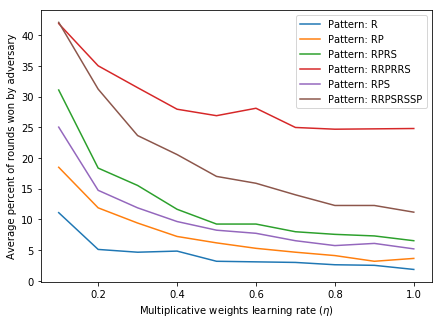

In [37]:
# Rock, paper, scissors: etas [0.1 --> 1, 0.1], count = 10
etas = [0.1,0.2,0.30000000000000004,0.4,0.5,0.6,0.7,0.7999999999999999,0.8999999999999999,0.9999999999999999]
learnerscore = [100,100,100,100,100,100,100,100,100,100]

# Data collected from running experiments
userscore0 = np.array([12.5,5.4,4.9,5.1,3.3,3.2,3.1,2.7,2.6,1.9])
userscore01 = np.array([22.7,13.5,10.4,7.8,6.6,5.6,4.9,4.3,3.3,3.8])
userscore0102 = np.array([45.1,22.5,18.4,13.2,10.2,10.2,8.7,8.2,7.9,7])
userscore001002 = np.array([72.1,53.9,45.9,38.8,36.8,39.1,33.3,32.8,32.9,33])
userscore012 = np.array([33.4,17.3,13.5,10.7,9,8.4,7,6.1,6.5,5.5])
userscore00120221 = np.array([72.7,45.4,31,25.9,20.5,18.9,16.3,14,14,12.6])

# Convert to percentages
userscore0 = userscore0 / (userscore0 + 100) * 100
userscore01 = userscore01 / (userscore01 + 100) * 100
userscore0102 = userscore0102 / (userscore0102 + 100) * 100
userscore001002 = userscore001002 / (userscore001002 + 100) * 100
userscore012 = userscore012 / (userscore012 + 100) * 100
userscore00120221 = userscore00120221 / (userscore00120221 + 100) * 100

# Plot percentages
plt.figure(figsize=(7,5))
plt.plot(etas, userscore0)
plt.plot(etas, userscore01)
plt.plot(etas, userscore0102)
plt.plot(etas, userscore001002)
plt.plot(etas, userscore012)
plt.plot(etas, userscore00120221)

plt.legend(["Pattern: R", "Pattern: RP", "Pattern: RPRS", "Pattern: RRPRRS", "Pattern: RPS", "Pattern: RRPSRSSP"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average percent of rounds won by adversary")

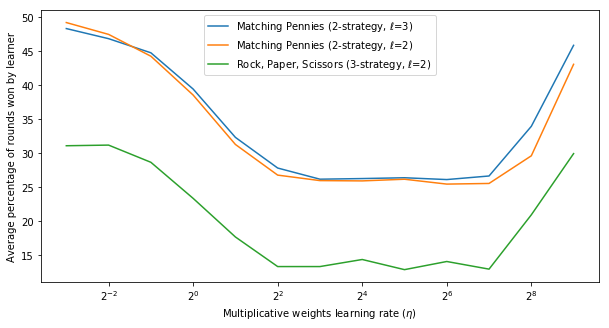

In [54]:
# Adversaries
etas = [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512]

MP_userscore = np.array([96.52,98.8,99.63,100,100,100,100,100,100,100,100,100,100]) # average of 100
MP_learnerscore = np.array([90.28,87.07,80.76,65.13,47.79,38.56,35.48,35.65,35.87,35.38,36.35,51.42,84.73])
MP2_userscore = np.array([95.96,97.24,99.91,100,100,100,100,100,100,100,100,100,100]) # average of 100
MP2_learnerscore = np.array([92.99,87.89,79.36,62.76,45.55,36.59,35.1,35.02,35.47,34.17,34.34,42.1,75.67])
RPS_userscore = np.array([100,100,100,100,100,100,100,100,100,100,100,100,100]) # average of 20
RPS_learnerscore = np.array([45.15,45.35,40.2,30.5,21.5,15.4,15.4,16.8,14.8,16.4,14.9,26.5,42.75])

# Add up total number of rounds
MP_total = MP_userscore + MP_learnerscore
MP2_total = MP2_userscore + MP2_learnerscore
RPS_total = RPS_userscore + RPS_learnerscore

# Percentage of rounds won by the learner
MP_percent = MP_learnerscore / MP_total * 100
MP2_percent = MP2_learnerscore / MP2_total * 100
RPS_percent = RPS_learnerscore / RPS_total * 100

# Plot percentages
plt.figure(figsize=(10, 5))
plt.plot(etas, MP_percent)
plt.plot(etas, MP2_percent)
plt.plot(etas, RPS_percent)

plt.legend(["Matching Pennies (2-strategy, $\ell$=3)", "Matching Pennies (2-strategy, $\ell$=2)", "Rock, Paper, Scissors (3-strategy, $\ell$=2)"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average percentage of rounds won by learner")
plt.xscale("log", basex=2)

# dip: 1/(N^2), ignoring history length
# MP dip ~ 25ish ~ 1/4ish
# RPS dip ~ 11 ish ~ 1/9ish
# every N rounds, adversary runs into a tiebreak which gives learner a (1/N) chance of winning
# 

In [73]:
# Probabilities of winning
learner_win = np.array([0.5,0.5,0.5,0.5,2.5722093726424316e-56,0.5000000000000014,0.5000000000000002,0.5000000000000004,0.5000000000000001,2.5722093726424325e-56,2.5722093726424334e-56,0.49999999999999956,0.4999999999999998,2.572209372642432e-56,0.4999999999999999,2.5722093726424316e-56,0.4999999999999999,0.5,0.49999999999999994,0.5,2.5722093726424325e-56,2.5722093726424325e-56,2.5722093726424334e-56,0.5000000000000001,2.5722093726424325e-56,2.572209372642432e-56,0.49999999999999994,0.5,2.572209372642433e-56,0.5000000000000001,2.5722093726424325e-56,0.5000000000000001,0.5,0.4999999999999999,0.5,2.5722093726424325e-56,2.5722093726424325e-56,2.572209372642433e-56,2.5722093726424334e-56,0.5,2.5722093726424325e-56,2.5722093726424325e-56,0.49999999999999994,0.5,2.5722093726424334e-56,0.5,2.572209372642433e-56,0.5000000000000001,0.5,0.4999999999999999,0.5,2.5722093726424325e-56,2.5722093726424325e-56,2.5722093726424334e-56,2.5722093726424334e-56,0.5,2.5722093726424325e-56,2.572209372642433e-56,0.49999999999999994,0.5,2.5722093726424334e-56,0.5,2.572209372642433e-56,0.5000000000000001,0.5,0.4999999999999999,0.5,2.5722093726424325e-56,2.5722093726424325e-56,2.5722093726424334e-56,2.5722093726424334e-56,0.5,2.5722093726424325e-56,2.572209372642433e-56,0.49999999999999994,0.5,2.5722093726424334e-56,0.5,2.572209372642433e-56,0.5000000000000001,0.5,0.4999999999999999,0.5,2.5722093726424325e-56,2.5722093726424325e-56,2.5722093726424334e-56,2.5722093726424334e-56,0.5,2.5722093726424325e-56,2.572209372642433e-56,0.49999999999999994,0.5,2.5722093726424334e-56,0.5,2.572209372642433e-56,0.5000000000000001,0.5,0.4999999999999999,0.5,2.5722093726424325e-56,2.5722093726424325e-56,2.5722093726424334e-56,2.5722093726424334e-56,0.5,2.5722093726424325e-56,2.572209372642433e-56,0.49999999999999994,0.5,2.5722093726424334e-56,0.5,2.572209372642433e-56,0.5000000000000001,0.5,0.4999999999999999,0.5,2.5722093726424325e-56,2.5722093726424325e-56,2.5722093726424334e-56,2.5722093726424334e-56,0.5,2.5722093726424325e-56,2.572209372642433e-56,0.49999999999999994,0.5,2.5722093726424334e-56,0.5,2.572209372642433e-56,0.5000000000000001,0.5,0.4999999999999999,0.5,2.5722093726424325e-56,2.5722093726424325e-56,2.5722093726424334e-56,2.5722093726424334e-56,0.5,2.5722093726424325e-56,2.572209372642433e-56,0.49999999999999994,0.5,2.5722093726424334e-56,0.5,2.572209372642433e-56,0.5000000000000001,0.5,0.4999999999999999,0.5,2.5722093726424325e-56,2.5722093726424325e-56,2.5722093726424334e-56,2.5722093726424334e-56,0.5,2.5722093726424325e-56,2.572209372642433e-56,0.49999999999999994,0.5,2.5722093726424334e-56,0.5,2.572209372642433e-56,0.5000000000000001,0.5,0.4999999999999999,0.5,2.5722093726424325e-56,2.5722093726424325e-56,2.5722093726424334e-56,2.5722093726424334e-56,0.5,2.5722093726424325e-56,2.572209372642433e-56,0.49999999999999994,0.5,2.5722093726424334e-56,0.5,2.572209372642433e-56,0.5000000000000001,0.5,0.4999999999999999,0.5,2.5722093726424325e-56,2.5722093726424325e-56,2.5722093726424334e-56,2.5722093726424334e-56,0.5,2.5722093726424325e-56,2.572209372642433e-56,0.49999999999999994,0.5,2.5722093726424334e-56,0.5,2.572209372642433e-56,0.5000000000000001,0.5,0.4999999999999999,0.5,2.5722093726424325e-56,2.5722093726424325e-56,2.5722093726424334e-56,2.5722093726424334e-56,0.5])
user_win = 1 - learner_win

# Expected score after however many rounds
expected_learner_score = np.cumsum(learner_win)
expected_user_score = np.cumsum(user_win)

In [93]:
learner_right = (learner_win > 0.25)*1
adversary_score = 0
learner_score = 0
for i in learner_right:
    if i == 1: 
        learner_score += 1
    else:
        adversary_score += 1
    if (learner_score == 100 or adversary_score == 100):
        print(learner_score, adversary_score)
        break

100 92


In [85]:
np.cumsum((learner_win < 0.2)*1)

array([ 0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  3,  3,  3,  4,  4,  5,  5,
        5,  5,  5,  6,  7,  8,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 12,
       12, 13, 14, 15, 16, 16, 17, 18, 18, 18, 19, 19, 20, 20, 20, 20, 20,
       21, 22, 23, 24, 24, 25, 26, 26, 26, 27, 27, 28, 28, 28, 28, 28, 29,
       30, 31, 32, 32, 33, 34, 34, 34, 35, 35, 36, 36, 36, 36, 36, 37, 38,
       39, 40, 40, 41, 42, 42, 42, 43, 43, 44, 44, 44, 44, 44, 45, 46, 47,
       48, 48, 49, 50, 50, 50, 51, 51, 52, 52, 52, 52, 52, 53, 54, 55, 56,
       56, 57, 58, 58, 58, 59, 59, 60, 60, 60, 60, 60, 61, 62, 63, 64, 64,
       65, 66, 66, 66, 67, 67, 68, 68, 68, 68, 68, 69, 70, 71, 72, 72, 73,
       74, 74, 74, 75, 75, 76, 76, 76, 76, 76, 77, 78, 79, 80, 80, 81, 82,
       82, 82, 83, 83, 84, 84, 84, 84, 84, 85, 86, 87, 88, 88, 89, 90, 90,
       90, 91, 91, 92, 92, 92, 92, 92, 93, 94, 95, 96, 96], dtype=int32)

In [76]:
expected_user_score

array([  0.5,   1. ,   1.5,   2. ,   3. ,   3.5,   4. ,   4.5,   5. ,
         6. ,   7. ,   7.5,   8. ,   9. ,   9.5,  10.5,  11. ,  11.5,
        12. ,  12.5,  13.5,  14.5,  15.5,  16. ,  17. ,  18. ,  18.5,
        19. ,  20. ,  20.5,  21.5,  22. ,  22.5,  23. ,  23.5,  24.5,
        25.5,  26.5,  27.5,  28. ,  29. ,  30. ,  30.5,  31. ,  32. ,
        32.5,  33.5,  34. ,  34.5,  35. ,  35.5,  36.5,  37.5,  38.5,
        39.5,  40. ,  41. ,  42. ,  42.5,  43. ,  44. ,  44.5,  45.5,
        46. ,  46.5,  47. ,  47.5,  48.5,  49.5,  50.5,  51.5,  52. ,
        53. ,  54. ,  54.5,  55. ,  56. ,  56.5,  57.5,  58. ,  58.5,
        59. ,  59.5,  60.5,  61.5,  62.5,  63.5,  64. ,  65. ,  66. ,
        66.5,  67. ,  68. ,  68.5,  69.5,  70. ,  70.5,  71. ,  71.5,
        72.5,  73.5,  74.5,  75.5,  76. ,  77. ,  78. ,  78.5,  79. ,
        80. ,  80.5,  81.5,  82. ,  82.5,  83. ,  83.5,  84.5,  85.5,
        86.5,  87.5,  88. ,  89. ,  90. ,  90.5,  91. ,  92. ,  92.5,
        93.5,  94. ,

In [79]:
36/136

0.2647058823529412

In [77]:
expected_learner_score[expected_user_score==100]

array([36.])

In [74]:
expected_user_score[134], expected_learner_score[134]

(99.5, 35.5)

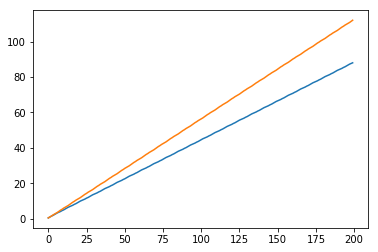

In [69]:
plt.plot(expected_learner_score)
plt.plot(expected_user_score)